**1\. Import the different libraries to be used for the data exploration and prediction**

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns # Data visualization
import numpy as np   #fundamental package for scientific computing
import pandas as pd  #fundamental package for data analysis
from sklearn.ensemble import RandomForestClassifier # package for binary classification (decision tree)
from sklearn.linear_model import LogisticRegression # package for binary classification (logistic regression)
from sklearn import metrics
from sklearn.cross_validation import train_test_split

**2\. Read the train_data and assign it to a dataframe named "df"**

In [48]:
df = pd.read_csv("train_data.csv.csv_fixed")

**3\. Data exploration**

In [30]:
df.head()

,user_id,channel,age,os,gender,country,customer
0,100000,00 Organic,20,ios,female,GB,0
1,100001,00 Organic,30,ios,female,US,1
2,100002,31 OUTBRAIN,35,ios,female,DE,0
3,100003,00 Organic,26,android,female,US,0
4,100004,32 Taboola,55,ios,female,US,1


In [50]:
df.isnull().sum() #clean dataset with no "nan" values

user_id     0
channel     0
age         0
os          0
gender      0
country     0
customer    0
dtype: int64

In [31]:
df.info() #high overview of the dataset with columns datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82908 entries, 0 to 82907
Data columns (total 7 columns):
user_id     82908 non-null int64
channel     82908 non-null object
age         82908 non-null int64
os          82908 non-null object
gender      82908 non-null object
country     82908 non-null object
customer    82908 non-null int64
dtypes: int64(3), object(4)
memory usage: 4.4+ MB


In [32]:
df.describe() #handy statistics about numerical columns

,user_id,age,customer
count,82908.000000,82908.000000,82908.000000
mean,141453.500000,31.151734,0.297848
std,23933.622396,11.596902,0.457315
min,100000.000000,12.000000,0.000000
25%,120726.750000,22.000000,0.000000
50%,141453.500000,29.000000,0.000000
75%,162180.250000,38.000000,1.000000
max,182907.000000,96.000000,1.000000


In [77]:
df['customer'].value_counts()

0    58214
1    24694
Name: customer, dtype: int64

In [49]:
df["channel"].value_counts()

00 Organic             21795
12 PINTEREST           13564
11 FB                   8857
22 Adwords (Search)     7371
95 LAT                  7043
41 Youtube              6522
31 OUTBRAIN             6237
42 Adcolony             4806
32 Taboola              2789
21 ASA                  2108
69 Others                876
62 Social Media          550
61 Web/Content           390
Name: channel, dtype: int64

In [51]:
df["country"].value_counts()

US    50855
GB     9226
MX     5755
CA     4483
ES     4172
AU     3398
DE     2849
FR     2170
Name: country, dtype: int64

In [53]:
df["age"].unique()

array([20, 30, 35, 26, 55, 36, 31, 19, 23, 22, 24, 47, 14, 50, 32, 46, 38,
       40, 41, 13, 17, 25, 29, 27, 48, 49, 21, 52, 42, 34, 45, 39, 43, 33,
       16, 18, 59, 56, 28, 53, 37, 12, 54, 60, 44, 51, 15, 61, 68, 58, 62,
       57, 64, 65, 69, 63, 66, 70, 67, 71, 73, 76, 77, 72, 95, 78, 80, 75,
       74, 79, 82, 87, 86, 94, 85, 96, 83, 81])

In [54]:
df["os"].value_counts()

ios        48662
android    34246
Name: os, dtype: int64

In [164]:
chan = pd.crosstab(df['channel'],df['customer'])
chan.sum(1)

channel
00 Organic             21795
11 FB                   8857
12 PINTEREST           13564
21 ASA                  2108
22 Adwords (Search)     7371
31 OUTBRAIN             6237
32 Taboola              2789
41 Youtube              6522
42 Adcolony             4806
61 Web/Content           390
62 Social Media          550
69 Others                876
95 LAT                  7043
dtype: int64

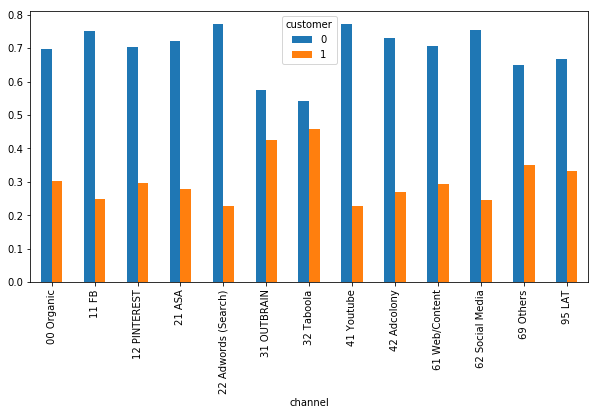

In [170]:
chan = chan.div(chan.sum(1).astype(float), axis=0)
chan.plot(kind='bar', stacked=False, title='')

**4\. Data visualization**

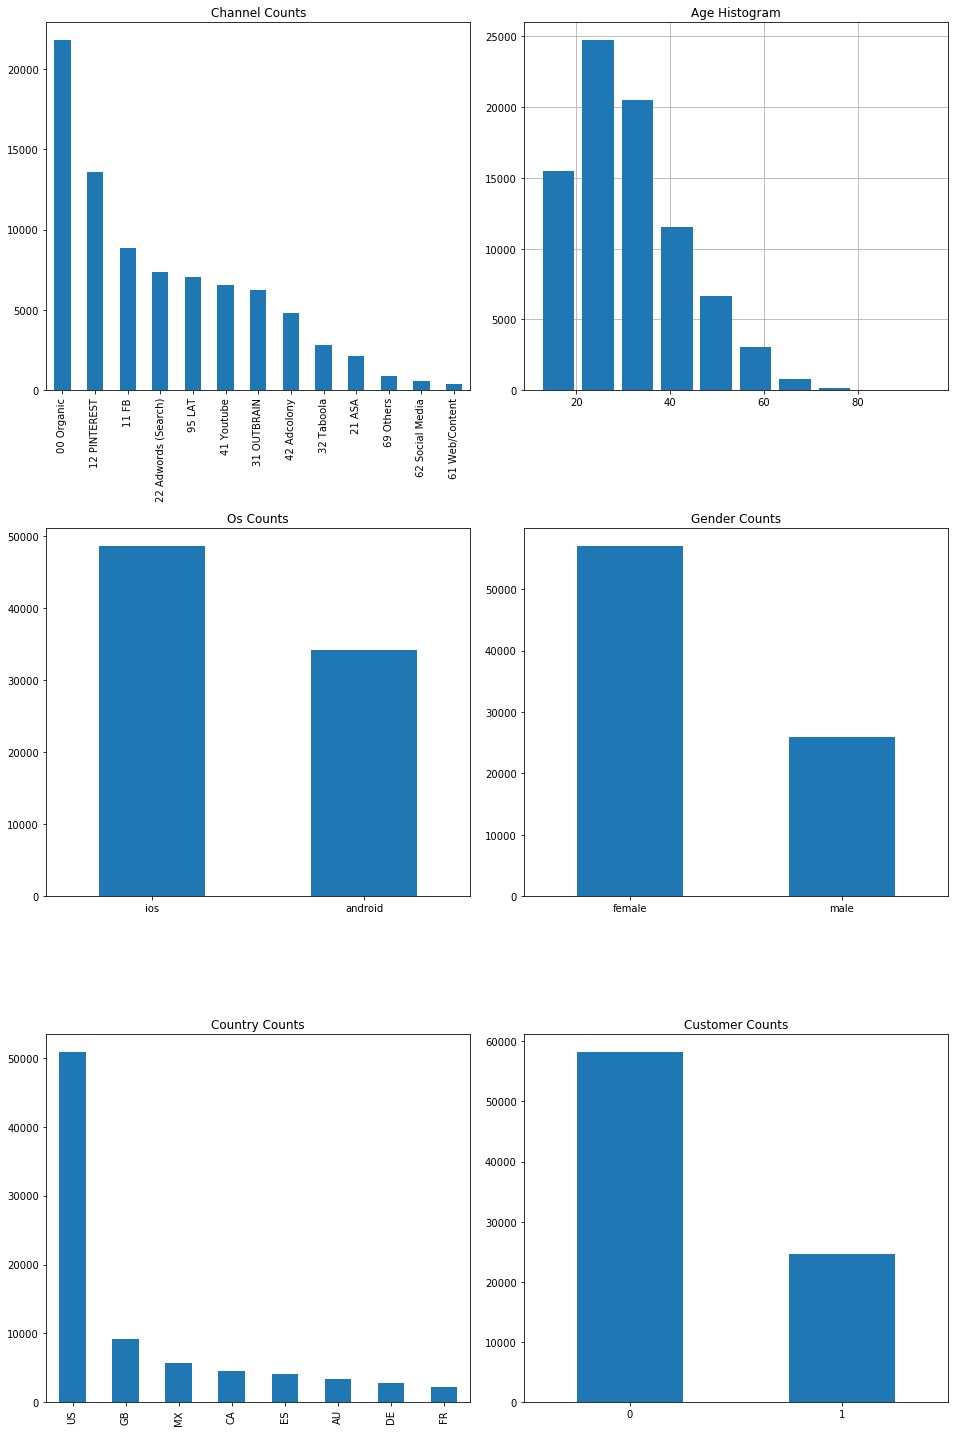

In [163]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 3)

# Plot channel counts
plt.subplot2grid(fig_dims, (0, 0))
df['channel'].value_counts().plot(kind='bar', title='Channel Counts')

# Plot age counts
plt.subplot2grid(fig_dims, (0, 1))
df['age'].hist(rwidth = 0.8, zorder=1)
plt.title('Age Histogram')

# Plot os counts
plt.subplot2grid(fig_dims, (1, 0))
df['os'].value_counts().plot(kind='bar', title='Os Counts')
plt.xticks(rotation=0)

# Plot gender counts
plt.subplot2grid(fig_dims, (1, 1))
df['gender'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xticks(rotation=0)

# Plot country counts
plt.subplot2grid(fig_dims, (2, 0))
df['country'].value_counts().plot(kind='bar', title='Country Counts')

# Plot customer counts
plt.subplot2grid(fig_dims, (2, 1))
df['customer'].value_counts().plot(kind='bar', title='Customer Counts')
plt.xticks(rotation=0)

plt.tight_layout()

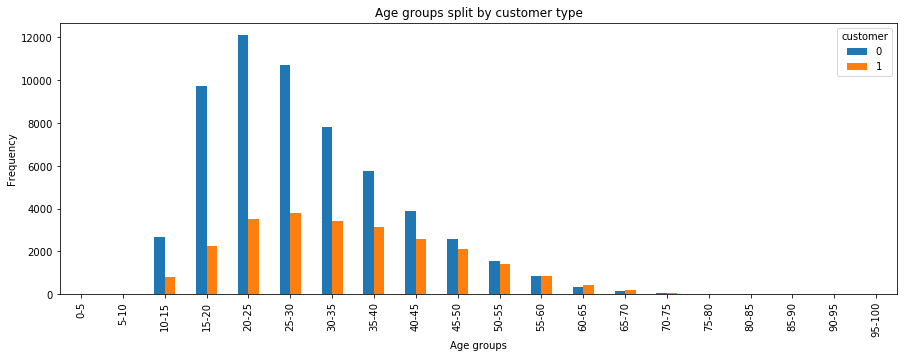

In [117]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
group_names = ['0-5', '5-10','10-15', '15-20', '20-25', '25-30',
               '30-35', '35-40','40-45', '45-50', '50-55', '55-60','60-65',
               '65-70','70-75','75-80','80-85','85-90','90-95','95-100' ]
df['age_groups'] = pd.cut(df['age'], bins, labels = group_names)
pd.crosstab(df['age_groups'], df['customer']).plot(kind = 'bar', figsize = (15, 5))

plt.title('Age groups split by customer type')
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.show()

**5\. Data Cleaning**

In [61]:
def cleaning(df):
    df = df.drop('user_id', axis = 1) #remove the user_id as this is irrelevant for the prediction
    
    for i in df.columns: #loop on every object column and convert it to dommuy variable
        if df[i].dtype == "O":
            df = pd.concat([df, pd.get_dummies(df[i], prefix = i)], axis=1)
            del df[i]
            
    df_x = df.drop(["customer"], axis = 1)
    df_y = df["customer"]
    
    return df_x, df_y

**6\. Machine Learning (Prediction)**

In [62]:
# #return a two dataframes that will be used for fitting a machine learning model (df_x and df_y)
df_x, df_y = cleaning(df)

In [65]:
df_x.info() #sanity check to see that there are no more columns of type "Objects"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82908 entries, 0 to 82907
Data columns (total 26 columns):
age                            82908 non-null int64
channel_00 Organic             82908 non-null uint8
channel_11 FB                  82908 non-null uint8
channel_12 PINTEREST           82908 non-null uint8
channel_21 ASA                 82908 non-null uint8
channel_22 Adwords (Search)    82908 non-null uint8
channel_31 OUTBRAIN            82908 non-null uint8
channel_32 Taboola             82908 non-null uint8
channel_41 Youtube             82908 non-null uint8
channel_42 Adcolony            82908 non-null uint8
channel_61 Web/Content         82908 non-null uint8
channel_62 Social Media        82908 non-null uint8
channel_69 Others              82908 non-null uint8
channel_95 LAT                 82908 non-null uint8
os_android                     82908 non-null uint8
os_ios                         82908 non-null uint8
gender_female                  82908 non-null uint8
gender_

In [74]:
# Split 80-20 train vs cross-validation data
train_x, cv_x, train_y, cv_y = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print ("size of original df: ",df_x.shape[0])
print ("size of training df: ",train_x.shape[0])
print ("size of cross-validation df: ",cv_x.shape[0])

size of original df:  82908
size of training df:  66326
size of cross-validation df:  16582


In [151]:
# Logistic Regression model

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

estimators = [
            ('scale_predictors', StandardScaler()),
            ('logisticregression', LogisticRegression())
            ]

clf = Pipeline(estimators)

grid_values = dict(logisticregression__C = [0.03, 0.1, 0.3, 1, 3, 10], # Inverse of the regularization factor.
               logisticregression__max_iter= [100, 500, 1000],
               logisticregression__class_weight= ['balanced', None])
              

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'accuracy')
grid_clf_acc.fit(train_x, train_y)

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)


Grid best parameter (max. accuracy):  {'logisticregression__C': 0.03, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 100}
Grid best score (accuracy):  0.70705304104


In [150]:
means = grid_clf_acc.cv_results_['mean_test_score']
stds = grid_clf_acc.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_clf_acc.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

0.618 (+/-0.003) for {'logisticregression__C': 0.03, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 100}
0.618 (+/-0.003) for {'logisticregression__C': 0.03, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 500}
0.618 (+/-0.003) for {'logisticregression__C': 0.03, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 1000}
0.707 (+/-0.003) for {'logisticregression__C': 0.03, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 100}
0.707 (+/-0.003) for {'logisticregression__C': 0.03, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 500}
0.707 (+/-0.003) for {'logisticregression__C': 0.03, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 1000}
0.618 (+/-0.003) for {'logisticregression__C': 0.1, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 100}
0.618 (+/-0.003) for {'logisticregression__C': 0.1,

In [145]:
#grid_clf_acc.grid_scores_[a]
list(grid_clf_acc.param_grid)

['logisticregression__C',
 'logisticregression__max_iter',
 'logisticregression__class_weight']

In [147]:
def performance(results, param1, param2):
    param1_vals = [x.parameters[param1] for x in results.grid_scores_]
    param2_vals = [x.parameters[param2] for x in results.grid_scores_]
    means = [x.mean_validation_score for x in results.grid_scores_]
    df = pd.DataFrame(list(zip(param1_vals, param2_vals, means)), columns = [param1, param2, 'means'])
    df.fillna('None', inplace=True)
    return pd.pivot_table(df, values = 'means' , index = param1, columns = param2)

In [148]:
a = list(grid_clf_acc.param_grid)

train_results = performance(grid_clf_acc, a[0],  a[1])

print(train_results)


logisticregression__max_iter      100       500       1000
logisticregression__C                                     
0.01                          0.662463  0.662463  0.662463
0.03                          0.662500  0.662500  0.662500
0.10                          0.662402  0.662402  0.662402
0.30                          0.662402  0.662402  0.662402
1.00                          0.662410  0.662410  0.662410
3.00                          0.662410  0.662410  0.662410
10.00                         0.662410  0.662410  0.662410
30.00                         0.662410  0.662410  0.662410
100.00                        0.662410  0.662410  0.662410


/home/charles/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/charles/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/charles/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [141]:
#Neural Network
from keras.models import Sequential
from keras.layers import Dense

In [142]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=26, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [143]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
# Fit the model
import numpy as np
model.fit(np.array(train_x), np.array(train_y), epochs=10, batch_size=10)

Epoch 1/10
66326/66326 [==============================] - 8s - loss: 0.5962 - acc: 0.7038     
Epoch 2/10
66326/66326 [==============================] - 10s - loss: 0.5878 - acc: 0.7053    
Epoch 3/10
66326/66326 [==============================] - 9s - loss: 0.5867 - acc: 0.7054     
Epoch 4/10
66326/66326 [==============================] - 9s - loss: 0.5861 - acc: 0.7060     
Epoch 5/10
66326/66326 [==============================] - 9s - loss: 0.5855 - acc: 0.7054     
Epoch 6/10
66326/66326 [==============================] - 11s - loss: 0.5850 - acc: 0.7063    
Epoch 7/10
66326/66326 [==============================] - 9s - loss: 0.5847 - acc: 0.7063     
Epoch 8/10
66326/66326 [==============================] - 9s - loss: 0.5842 - acc: 0.7052     
Epoch 9/10
66326/66326 [==============================] - 10s - loss: 0.5841 - acc: 0.7065    
Epoch 10/10
66326/66326 [==============================] - 9s - loss: 0.5838 - acc: 0.7062     


**7\. Prediction on the test set**

In [26]:
df_test_set = pd.read_csv("test_data.csv.csv_fixed")

In [ ]:
df_test_x, df_test_y = dfcleaning(df_test_set)

In [ ]:
predict_y = clf.predict(df_x)